# Content

- **Introduction to Business case: Data Scientist at pharmaceutical company**
- **Types of NER: An introduction**
  - Classical approaches
  - DL approaches
  - Hybrid approaches
- **Classical approaches**
  - Dictionary based
  - Rule based
- **Machine Learning approaches**
  - Multi-class classification
- **Ner Ambiguities**
- **Sequence labelling approaches**
- **CRFs**
  - Introduction
  - Function explanation
- **DL approaches**
  - Bi-Directional LSTM with CNN
  - Bi-Directional LSTM with CRFs
- **Training an NER model**
  - Reading data
  - Preprocessing & EDA
  - Model building - Bi-LSTM + CRF
  - Why we cannot use this
- **Using a pre-trained domain-specific NER models**
  - Bio-Medical NER :- Stanza
    - i2b2
    - bc5cdr
- **Scopes for improvement**
- **Conclusion**

## Problem Statement

You are a **Data Scientist** working at a pharmaceutical company (J&J, Pfizer, Glaxo, etc).

Studying adverse drug reactions in patients is central to drug development in healthcare.

The company wants to find relationship between drug and adverse events/ symptoms leveraging the review data.
Your task is to build a mechanism
- to identify the problems (adverse events/side-effects/symptoms etc)
- tag them to the drug name which is causing them

![Screenshot%202022-03-16%20153746.png](https://drive.google.com/uc?id=1f2_TgNaUuqPID3N2B39XD_XPQLkwVbuE)


## Why Information Extraction?

1. To find and understand limited relevant parts of text
2. Gather information
3. Produce a structure representation  of relevant information
  
## How to solve this problem?

- A model that will be trained on various annotated data and help us tag or identify different entities of our interest.

- <b>Information Extraction </b> is the art of extracting useful information from large piece of text and using it directly or indirectly to gain insights.

- It is basically extracting important information based on the semantic(logical) meaning of the sentence.


### Goals:
1. organize information
2. put info in a semantically precise form, to be inferred by other algo


IE system extracts clear and factual information

### Some Examples:

But with this limited information a lot of problems can be solved.
Let's take a simple example of
1. how <b> email service provider, suggest a meeting </b> by detecting a time frame in the mail body.
![PjBvj.png](https://drive.google.com/uc?id=13e_IUK1wBqbSZ7Lx_lTy4_BRlNFfGyZ3)


2. handling the <b> customer support department </b> of an electronic store with multiple branches worldwide,
![Screenshot%202022-03-23%20182101.png](https://drive.google.com/uc?id=1Hlu_Y1UXmywE6Cqv3KAFBoxKv2RfhUK-)

    -- Now, if you pass it through the Named Entity Recognition API, it pulls out the entities Bandra (location) and Fitbit (Product).

    -- This can be then used to categorize the complaint and assign it to the relevant department within the organization that should be handling this.
    

3. A map service provider can <b>detect a address and search it in the app </b> directly.

---
### What is NER?
---

- Named-entity recognition (NER), in general, (also known as entity identification or entity extraction) is a <b>subtask of information extraction </b> (text analytics) that aims at finding and categorizing specific entities.

- NER involves the identification of proper names in texts, and the classification of these names into a set of predefined categories of interest like <b>person, location, organization, drug, time, etc.</b>

- It refers to extracting <b>‘named-entities’ </b> from text. Named-entities denotes to words in a sentence representing real-world objects with proper names like:
  - Person’s name (Ramu, Raja, Seeta, etc.),
  - Countries (India, Sri Lanka, etc),
  - Organization (Google, Facebook, etc.)
  - or anything that has been given a specific name.

![Screenshot%202022-03-16%20155958.png](https://drive.google.com/uc?id=1GHCB_eXwDtL2UNWc2L4UYlGLIWUIjh5w)

## Types of NER


<b>    
- Classical Approaches (rule-based or Dictionary)
- ML Approaches
    - Multi-class classification
    - Conditional Random Field (CRF)
- DL Approaches
    - Bidirectional LSTM-CRF
    - Bidirectional LSTM-CNNs
    - Bidirectional LSTM-CNNS-CRF
    - Pre-trained language models (Elmo and BERT)
- Hybrid Approaches (DL + ML)
    
</b>

---
## What are some Classical Approaches?
---
### Dictionary based
- This is the simplest NER approach. Here we will be having a <b> dictionary that contains a collection of vocabulary </b>.  

- Basic string-matching algorithms are used to check whether the entity is occurring in the given text to the items in vocabulary.

**Cons:** The method has limitations as it is required to update and maintain the dictionary used for the system.

### Rule Based
- Here, the model uses a pre-defined set of rules for information extraction.

Two main kinds of rules used are:

- <b> Pattern-based rules,</b> which depend upon the morphological pattern of the words used, and

- <b>context-based rules,</b> which depend upon the context of the word used in the given text document. A simple example for a context-based rule is
  - Let's suppose you have been asked to mask <b> PII (Personally identifiable information) from free text </b>
  - We can have a rule based NER that if a person’s title is followed by a proper noun, then that proper noun is the name of a person.
![Screenshot%202022-03-24%20200726.png](https://drive.google.com/uc?id=1MPFcz50tN_0K1TjjCBGeNczvCBSSrm68)

Consider **"The medicine was prescribed by Dr. Sharma and the patient responded in a positive manner."**

- In this case <b>Dr. Sharma</b> will be labelled as name.

**Cons:** But we will miss on a lot of names, if it doesn't start with a title like Mr, Mrs, Ms, Dr, etc.

---
## Now, on to Machine Learning Approaches:
---
### Multi-class Classification
- Named entities are the labels so we can apply different classification algorithms.
  
- There are mainly two phases while we use an ML-based solution for NER.
  1. Training the ML model on the annotated documents.
  2. The trained model can be used to annotate the raw documents.
 ![Screenshot%202022-03-16%20154647.png](https://drive.google.com/uc?id=1K_RSU3vI_ps80Ho79sgGepjkQmqgGYgK)

**Cons:** The problem of identifying and labelling named entities requires thorough understanding of the context of a sentence and sequence of the word labels in it, this context is ignored here



---
### Why is NER hard?
---
Some of the various ambiguities in NER include:
- <b>Segmentation(Detection) ‘ambiguity’. </b>

Consider ‘New York’. This can be detected as ‘New’ & ‘York’ as separate entities.

Hence, deciding over the boundary is crucial whether to consider ‘New York’ as a single entity or ‘New’ and ‘York’ 2 different entities.

- <b>Tag assignment(Recognition) ‘ambiguity’. </b>

We have ‘Nirma’ as a girl’s name (PERSON )& as a detergent brand(Organization in India).


- In order to overcome these ambiguities, we introduce a new concept called **Sequence Labelling**
---
### What is Sequence labelling?
---
- It refers to assigning labels/tags to each element of a sequence being passed as an input using an algorithm or machine learning model.

- This sequence can be <b> words of a sentence passed in the same order as in the sentence </b>.

A LSTM can be taken as a Sequence labeller.

NER can be done using a number of Sequence Labelling methods listed below alongside Rule-Based methods:
1. Linear Chain Conditional Random Fields (Linear Chain CRF)
2. Maximum Entropy Markov Models
3. Bi-LSTM


### Why Conditional Random Fields?

- well suited for handling NER problems, because it takes **context into account**
- when a CRF model makes a prediction, it factors in the impact of neighbouring samples by modelling the prediction as a graphical model.

- A **linear chain CRF** confers to a labeller in which tag assignment(for present word, denoted as yᵢ) **depends only on the tag of just one previous word**(denoted by yᵢ₋₁). </b>

### Deciding Feature Functions:
We need to extract multiple features per word of the sentence that will be assisting in recognizing a Named Entity.
For this, we need functions called as feature functions that will assist in generating unique features.
- These features function can consider any logic(depends on programmer) but the output has to be either True:1 or False:0.

### Optional: Math of Linear CRF
Diagram:

 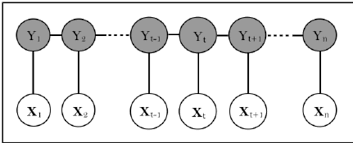


 Fundamental Equation:
![Screenshot%202022-03-16%20160159.png](https://drive.google.com/uc?id=1UWFuyXjiupyyYx27iqxf-c-um0f2-kyG)

- The inner summation goes from i=1 to i=length of sentence ‘L’.
Hence we are summating the value of any feature function for all words of the sentence

if we have a sentence ‘Ram is cool’, the inner summation will add values of the output of the jᵗʰ feature function for all 3 words of the sentence
- The outer summation goes from j=1 to the total number of feature functions.
 It is doing something like this

<b>W₁ * Σfeature_function₁ + W₂ * Σfeature_function₂……</b>
- Wⱼ refers to weights assigned to a feature_functionⱼ.
The denominator is referred to as Normalizing constant. It looks quite similar to the numerator with a couple of changes in the formula
y’ in place of y
A third summation over y’.

Let us understand this.
y’ refers to all the possible Label Sequence that can be assigned to a word sequence (sentence).

<i>Bringing back ‘Ram is cool’.
If you remember the named Entity Tag table mentioned above, we have a number of possible tags like PER, LOC, VEH, ORG, etc. Hence the assigned label sequence can be [PER, PER, LOC], [O, O, O], [VEH, ORG, O] and many many more!!! </i>

Now, if I wish to calculate the
 P([PER, PER, LOC] | ‘Ram is cool’)=

- <b>Numerator = exp (Σⱼ wⱼ Σ ᵢ Fⱼ(‘Ram is cool’,’PER PER LOC’)) </b>

- <b>Denominator =exp (Σⱼ wⱼ Σ ᵢ Fⱼ(‘Ram is cool’,’O O O’))+exp (Σⱼ wⱼ Σ ᵢ Fⱼ(‘Ram is cool’,’ VEH ORG O’))+exp (Σⱼ wⱼ Σ ᵢ Fⱼ(‘Ram is cool’,’PER ORG ORG’))…. </b>


Hence, the 3rd summation in denominator refers to summation for all label sequence possible for the sentence, and y’ refers to these possible combinations.

A couple of points note:
- As we know the <b> correct sequence label for ‘Ram is cool’ is [PER O O]. </b>

Hence,
P([PER O O ]|’Ram is cool’) should be highest amongst all other possible sequences for ‘Ram is cool’ if our CRF is trained well.

- Linear CRF appears quite similar to logistic regression.  


## Deep Learning:

 ### Bi-directional LSTM with CNN

 - Recurrent neural networks (RNNs) are a powerful family of connectionist models that capture time dynamics via cycles in the graph.

- But they <b> fail due to the gradient vanishing/exploding problems.</b> LSTMs are variants of RNNs designed to cope with these gradient vanishing problems.

- For many sequence labelling tasks it is beneficial to have access to both past (left) and future (right) contexts.

- However, the <b> LSTM’s hidden state (ht) takes information only from past, knowing nothing about the future</b>. An elegant solution whose effectiveness has been proven by previous work is bi-directional LSTM

- The basic idea is to present each sequence <b> forwards and backwards to two separate hidden states to capture past and future information</b>, respectively. Then the two hidden states are concatenated to form the final output.
 ![Screenshot%202022-03-24%20234015.png](https://drive.google.com/uc?id=1MeCHvO5TgP0t1M7Ng2wIwWGoHOwoPIRu)

- Convolutional neural networks **(CNN)** have also been investigated for <b> modelling character-level information</b>, among other NLP tasks. So in NER CNNs are used to extract character-level features for and POS-tagging respectively

 ![Screenshot%202022-03-24%20235036.png](https://drive.google.com/uc?id=1DIRyNjnotxMgMBz_jeZqDwQQz19kbu-A)


 ### Bi-directional LSTM CRF

We have how a Bi-directional LSTM model works with another layer of CNN, but for sequence labelling we can consider <b>CRF</b>, as

- it is beneficial to consider the <b>correlations between labels in neighbourhoods</b> and jointly decode the best chain of labels for a given input sentence.

    - For example, in POS tagging an adjective is more likely to be followed by a noun than a verb,
    - In NER with standard BIO2 annotation I-ORG cannot follow I-PER.
    - Therefore, we model label sequence jointly using a conditional random field (CRF) instead of decoding each label independently.

![Screenshot%202022-03-24%20234015.png](https://drive.google.com/uc?id=1zKIqm5yPB1g7vEoMasOnE_OmU9kC366G)

## Hybrid

- Hybrid methods are composed of **rule-based and deep learning** approaches, which facilitates the extraction of  entities out of  texts of domains that lack generic named entities labelled domain data sets.

- The proposed approach takes the advantages of both deep learning and clustering approaches but separately, in combination with a knowledge-based approach by using a postprocessing module

# Training a NER from  scratch

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

In [ ]:
# Hyperparams if GPU is available
if tf.test.is_gpu_available():
    BATCH_SIZE = 512  # Number of examples used in each iteration
    EPOCHS = 5  # Number of passes through entire dataset
    MAX_LEN = 75  # Max length of review (in words)
    EMBEDDING = 40  # Dimension of word embedding vector
# Hyperparams for CPU training
else:
    BATCH_SIZE = 32
    EPOCHS = 5
    MAX_LEN = 75
    EMBEDDING = 20

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


## Reading Data

In [ ]:
!gdown 1ao5aINQqedAWHSXGLpAVzW1iEZj7sZ5_
!gdown 15RuVEDqO592th-44iVEpcGbtvX9RjDWR

Downloading...
From: https://drive.google.com/uc?id=1ao5aINQqedAWHSXGLpAVzW1iEZj7sZ5_
To: /content/ner_dataset.csv
100% 15.2M/15.2M [00:00<00:00, 35.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=15RuVEDqO592th-44iVEpcGbtvX9RjDWR
To: /content/drugsComTrain_raw.csv
100% 1.38M/1.38M [00:00<00:00, 164MB/s]


In [ ]:
data = pd.read_csv("/content/ner_dataset.csv", encoding="latin1")


# Show the first 10 rows
data.head(n=10)

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O
5,NaN,through,IN,O
6,NaN,London,NNP,B-geo
7,NaN,to,TO,O
8,NaN,protest,VB,O
9,NaN,the,DT,O


We see in column "Sentence #"  sentence 1 is followed by NaN, so we need to fill the same we whatever the value is in top

In [ ]:
data = data.fillna(method="ffill")
data.head(n=24)

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O
5,Sentence: 1,through,IN,O
6,Sentence: 1,London,NNP,B-geo
7,Sentence: 1,to,TO,O
8,Sentence: 1,protest,VB,O
9,Sentence: 1,the,DT,O


Now, this looks better.

As we see the dataset has 4 columns
- Sentence # (the sentence number)
- Word
- POS
- Tag (the annotation which is manually labelled against each word)

This method of labelling is known as sequence labelling. Let's take a look at some of the numbers./

In [ ]:
data.shape

(1048575, 4)

In [ ]:
print("Number of sentences: ", len(data.groupby(['Sentence #'])))


Number of sentences:  47959


In [ ]:
words = list(set(data["Word"].values))
n_words = len(words)
print("Number of unique words in the dataset: ", n_words)

Number of unique words in the dataset:  35178


The number of words is less than number of sentence. Its becuase we can have same word in different sentences.

In [ ]:
n_tags = len(data.groupby(['Tag']))
print("Number of Labels: ", n_tags)


Number of Labels:  17


In [ ]:
tags = list(set(data["Tag"].values))
print("Tags:", tags)

Tags: ['I-geo', 'I-art', 'I-eve', 'B-eve', 'B-tim', 'O', 'I-org', 'I-gpe', 'B-art', 'I-tim', 'B-nat', 'I-nat', 'B-per', 'B-org', 'I-per', 'B-gpe', 'B-geo']


<b>

- geo = Geographical Entity
- org = Organization
- per = Person
- gpe = Geopolitical Entity
- tim = Time indicator
- art = Artifact
- eve = Event
- nat = Natural Phenomenon
    
</b>

In [ ]:
#let's check the frequency of each tag
data['Tag'].value_counts()

O        887908
B-geo     37644
B-tim     20333
B-org     20143
I-per     17251
B-per     16990
I-org     16784
B-gpe     15870
I-geo      7414
I-tim      6528
B-art       402
B-eve       308
I-art       297
I-eve       253
B-nat       201
I-gpe       198
I-nat        51
Name: Tag, dtype: int64

We can see the <b> GEO (gepgraphic location) tag has the max frequency </b>, followed by time entity.


## Preprocessing

For Preprocessing, we will first put each sentence through a function which will <b> put each of the words along with its POS and Tag together in a tuple</b>. Each sentence will form a list of tuples.

In [ ]:
class SentenceGetter(object):
    """Class to Get the sentence in this format:
    [(Token_1, Part_of_Speech_1, Tag_1), ..., (Token_n, Part_of_Speech_n, Tag_n)]"""
    def __init__(self, data):
        """Args:
            data is the pandas.DataFrame which contains the above dataset"""
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, p, t) for w, p, t in zip(s["Word"].values.tolist(),
                                                           s["POS"].values.tolist(),
                                                           s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]

    def get_next(self):
        """Return one sentence"""
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

getter = SentenceGetter(data)
sent = getter.get_next()
print('This is what a sentence looks like:')
print(sent)

This is what a sentence looks like:
[('Thousands', 'NNS', 'O'), ('of', 'IN', 'O'), ('demonstrators', 'NNS', 'O'), ('have', 'VBP', 'O'), ('marched', 'VBN', 'O'), ('through', 'IN', 'O'), ('London', 'NNP', 'B-geo'), ('to', 'TO', 'O'), ('protest', 'VB', 'O'), ('the', 'DT', 'O'), ('war', 'NN', 'O'), ('in', 'IN', 'O'), ('Iraq', 'NNP', 'B-geo'), ('and', 'CC', 'O'), ('demand', 'VB', 'O'), ('the', 'DT', 'O'), ('withdrawal', 'NN', 'O'), ('of', 'IN', 'O'), ('British', 'JJ', 'B-gpe'), ('troops', 'NNS', 'O'), ('from', 'IN', 'O'), ('that', 'DT', 'O'), ('country', 'NN', 'O'), ('.', '.', 'O')]


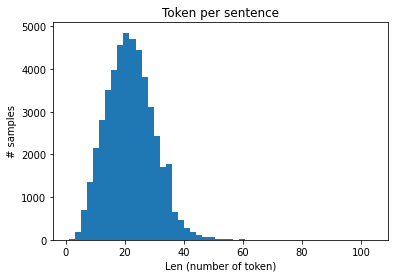

In [ ]:
# Get all the sentences
sentences = getter.sentences
# Plot sentence by lenght
plt.hist([len(s) for s in sentences], bins=50)
plt.title('Token per sentence')
plt.xlabel('Len (number of token)')
plt.ylabel('# samples')
plt.show()

From the histogram, we can see most of the sentences have around <b> 15 to 30 tokens </b>. Tokens can we referred as words ignoring punctuation marks.

- <b>Further PreProcessing:</b>

- We will convert each text word to a corresponding integer ID using the <b> word2idx dictionary</b>. Doing so saves a lot of memory.
- In order to feed the data to out Bi-LSTM-CRF model, we need to ensure that all text should be of the same length.
 - The method sequence.pad_sequences() and variable MAX_LEN are used for this purpose.
 - The text which are shorter than MAX_LEN are padded to get them to the same length, whereas text which are longer than MAX_LEN are truncated.

In [ ]:
import sklearn

# Vocabulary Key:word -> Value:token_index
# The first 2 entries are reserved for PAD and UNK
word2idx = {w: i + 2 for i, w in enumerate(words)}
word2idx["UNK"] = 1 # Unknown words
word2idx["PAD"] = 0 # Padding

# Vocabulary Key:token_index -> Value:word
idx2word = {i: w for w, i in word2idx.items()}

# Vocabulary Key:Label/Tag -> Value:tag_index
# The first entry is reserved for PAD
tag2idx = {t: i+1 for i, t in enumerate(tags)}
tag2idx["PAD"] = 0

# Vocabulary Key:tag_index -> Value:Label/Tag
idx2tag = {i: w for w, i in tag2idx.items()}
print("The word Obama is identified by the index: {}".format(word2idx["Obama"]))
print("The labels B-geo(which defines Geopraphical Enitities) is identified by the index: {}".format(tag2idx["B-geo"]))


The word Obama is identified by the index: 2888
The labels B-geo(which defines Geopraphical Enitities) is identified by the index: 17


In [ ]:
#from keras.preprocessing.sequence import pad_sequences
from keras_preprocessing.sequence import pad_sequences

# Convert each sentence from list of Token to list of word_index
X = [[word2idx[w[0]] for w in s] for s in sentences]

# Padding each sentence to have the same lenght
X = pad_sequences(maxlen=MAX_LEN, sequences=X, padding="post", value=word2idx["PAD"])

# Convert Tag/Label to tag_index
y = [[tag2idx[w[2]] for w in s] for s in sentences]

# Padding each sentence to have the same lenght
y = pad_sequences(maxlen=MAX_LEN, sequences=y, padding="post", value=tag2idx["PAD"])
from keras.utils import to_categorical

# One-Hot encode
y = [to_categorical(i, num_classes=n_tags+1) for i in y]  # n_tags+1(PAD)
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.1)
X_tr.shape, X_te.shape, np.array(y_tr).shape, np.array(y_te).shape


print('Raw Sample:\n ', ' '.join([w[0] for w in sentences[0]]))
print('\n ' )
print('Raw Label:\n ', ' '.join([w[2] for w in sentences[0]]))
print('\n ' )
print('After processing, sample:\n', X[0])
print('\n ' )
print('After processing, labels:\n', y[0])

Raw Sample:
  Thousands of demonstrators have marched through London to protest the war in Iraq and demand the withdrawal of British troops from that country .

 
Raw Label:
  O O O O O O B-geo O O O O O B-geo O O O O O B-gpe O O O O O

 
After processing, sample:
 [11251 23279 10963  6389   584 12374  7383  7376  7296 15453  4324 26289
 10427 32060  1488 15453 12161 23279 17470 15923 24358  4447   396 24941
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0]

 
After processing, labels:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [ ]:
y_tr = np.array(y_tr)
y_te = np.array(y_te)

## Model Building - Bi-LSTM + CRF

In [ ]:
!pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 54.6 MB/s eta 0:00:00


In [ ]:
from keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow_addons.utils.types import FloatTensorLike, TensorLike

# LSTM components
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional

# CRF layer
from tensorflow_addons.layers import CRF

# Sigmoid focal cross entropy loss. works well with highly unbalanced input data
from tensorflow_addons.losses import SigmoidFocalCrossEntropy
from tensorflow_addons.optimizers import AdamW


def build_model(max_len = 75, input_dim = 35180, embedding_dim = 200):
  # Model definition
  input = Input(shape=(max_len,))

  # Get embeddings
  embeddings = Embedding(input_dim=input_dim,
                      output_dim=embedding_dim,
                      input_length=max_len, mask_zero=True,
                    )(input)

  # variational biLSTM
  output_sequences = Bidirectional(LSTM(units=50, return_sequences=True))(embeddings)

  # Stacking
  output_sequences = Bidirectional(LSTM(units=50, return_sequences=True))(output_sequences)

  # Adding more non-linearity
  dense_out = TimeDistributed(Dense(25, activation="relu"))(output_sequences)

  # CRF layer
  crf = CRF(18, name='crf')
  predicted_sequence, potentials, sequence_length, crf_kernel = crf(dense_out)

  model = Model(input, potentials)
  model.compile(
      optimizer=AdamW(weight_decay=0.001),
      loss= SigmoidFocalCrossEntropy()) # Sigmoid focal cross entropy loss

  return model

model = build_model()

# Checkpointing
save_model = tf.keras.callbacks.ModelCheckpoint(filepath='twitter_ner_crf.h5',
  monitor='val_loss',
  save_weights_only=True,
  save_best_only=True,
  verbose=1
)

# Early stopping
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, patience=10)

callbacks = [save_model, es]

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 75)]              0         
                                                                 
 embedding (Embedding)       (None, 75, 200)           7036000   
                                                                 
 bidirectional (Bidirectiona  (None, 75, 100)          100400    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 75, 100)          60400     
 nal)                                                            
                                                                 
 time_distributed (TimeDistr  (None, 75, 25)           2525      
 ibuted)                                                         
                                                             

# What are potentials?
- Potentials are outputs of feature functions in a CRF model.
- In a linear chain CRF, they can be further divided into transition and emission potentials.
- These potentials are then processed by a CRF kernel and sequences are generated using algorithms like [viterbi decoding](https://en.wikipedia.org/wiki/Viterbi_decoder)
- A simple implementation of a CRF kernel can be found [here](https://pytorch.org/tutorials/beginner/nlp/advanced_tutorial.html#advanced-making-dynamic-decisions-and-the-bi-lstm-crf). Implementation of CRF kernel by tensorflow can be found on their [github](https://github.com/tensorflow/addons/blob/v0.17.0/tensorflow_addons/layers/crf.py)

In [ ]:
model.fit(X_tr, y_tr, validation_data = (X_te, y_te), shuffle = True)

1349/1349 [==============================] - 76s 35ms/step - loss: 0.1349 - val_loss: 0.0305


Now, let's again go back to our original ask.
- We need to find relation between drug name and problems it is causing.

### But there are <b> 2 obstacles </b> :
- But we <b>don't have any entity</b> tags which talk either about <b>drug name</b> or <b> side effects/problems/diseases </b>.
- We <b> need a lot of annotated data from a specific domain </b> (in this case BioMedical data)

### How do we tackle it?

- The answer is we use a pre-trained domain specific NER. There are domain specific NERs such as banking, e-commerce, manufacturing, bio-medical NER.  

- Before that, let's check the dataset which has review data from a pharma company.

In [ ]:
raw_df=pd.read_csv('/content/drugsComTrain_raw.csv', encoding='iso-8859-1')
raw_df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461.0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,20-May-12,27.0
1,95260.0,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,27-Apr-10,192.0
2,92703.0,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,14-Dec-09,17.0
3,138000.0,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,03-Nov-15,10.0
4,35696.0,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,27-Nov-16,37.0


We can see, the data has these important columns:
<b>
1. drugName
2. condition
3. review
</b>
Let's take a look at one of review, and understand how a <b> SME would have labelled it manually. </b>

In [ ]:
print('Review Number:',raw_df['uniqueID'][0])
print('Drug Name:',raw_df['drugName'][0])
print('Review:',raw_df['review'][0])

Review Number: 206461.0
Drug Name: Valsartan
Review: "It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"


And we see, for review number 206461, there were <b> no side-effects or problem </b> being caused by the drug Valsartan. Let's take a look at another example.

In [ ]:
print('Review Number:',raw_df['uniqueID'][15])
print('Drug Name:',raw_df['drugName'][15])
print('Review:',raw_df['review'][15])

Review Number: 81890.0
Drug Name: Liraglutide
Review: "I have been taking Saxenda since July 2016.  I had severe nausea for about a month once I got up to the 2.6 dosage.  It has since subsided and the only side effect I notice now is the dry mouth.  I make sure to drink  2.5 litres of water a day (about 10 glasses).  This helps with the weight loss as well as the constipation.  I have been reducing my dose to find a comfortable spot where I am still losing weight but don&#039;t feel like I am over medicating.  For me, 1.8 is working very well.  I also feel wearing a Fitbit has really helped.  I can track my food, water, exercise and steps - it keeps me moving more.  When this started I could barely walk the length of myself without getting winded - I have lost 58 lbs so far."


<b> Liraglutide </b> is a molecule used to treat type 2 diabetes and chronic weight management. Now, we can see there are some side-effects attached to it
- <b> dry mouth </b>
- <b>nausea </b>

So, as we get closer to the ask. We need to map Liraglutide with dry mouth and nausea.

<b>But, how? </b>

Let's check what are the tools we have in hand. But before that, let's take a look at how a word cloud on this review column would look like:

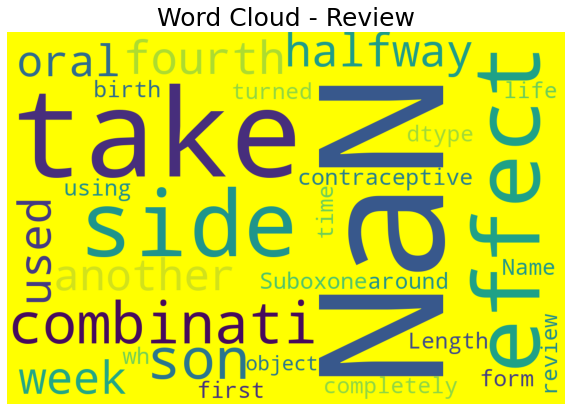

In [ ]:
# let's see the words cloud for the reviews

# most popular drugs

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'yellow', stopwords = stopwords, width = 1200, height = 800).generate(str(raw_df['review']))

plt.rcParams['figure.figsize'] = (10, 15)
plt.title('Word Cloud - Review', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

Not much information, is inferred from the word cloud.

- We need a model which is pre-trained on Bio-Medical data and would be able to identify drug names and side-effects/symptoms and disease name. So here comes, stanza

## Bio-Medical NER - Stanza

At a high level, Stanza currently provides packages that support <b> Universal Dependencies (UD)-compatible syntactic analysis </b> and named entity recognition (NER) from both English biomedical literature and clinical note text. Officially offered packages include:

- 2 UD-compatible biomedical syntactic analysis pipelines, trained with human-annotated treebanks;
- 1 UD-compatible clinical syntactic analysis pipeline, trained with silver data;


![Screenshot%202022-03-16%20184002.png](https://drive.google.com/uc?id=1FDU5qfDpm9w0EYqVmqymqy9LtabhBeJy)
- 8 accurate biomedical NER models augmented with contextualized representations;
- 2 clinical NER models, including one specialized in radiology reports.



![Screenshot%202022-03-16%20183750.png](https://drive.google.com/uc?id=15Omc0QfQzI9wer54ncHhtP8bGWzw1jBh)

The 16 entity types in the BioNLP13CG model include, some of which are:
- ORGAN
- ORGANISM
- PROBLEM
- TREATMENT
- DISEASE
- CHEMICAL

<B> Let's import stanza </b>

In [ ]:
!pip install stanza

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 691.3/691.3 KB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 18.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=3cd2df92b15ac39a9b4886271d957b2803dc4b7c26d25fe59ca720c1c7adb029
  Stored in directory: /root/.cache/pip/wheels/86/62/9e/a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
Successfully built emoji


In [ ]:
import stanza
stanza.download('en', package='mimic',processors={'ner':'i2b2'})
stanza.download('en', package='mimic',processors={'ner':'bc5cdr'})

INFO:stanza:Downloading these customized packages for language: en (English)...
| Processor       | Package |
-----------------------------
| tokenize        | mimic   |
| pos             | mimic   |
| lemma           | mimic   |
| depparse        | mimic   |
| ner             | i2b2    |
| forward_charlm  | mimic   |
| pretrain        | mimic   |
| backward_charlm | mimic   |



INFO:stanza:Finished downloading models and saved to /root/stanza_resources.


INFO:stanza:Downloading these customized packages for language: en (English)...
| Processor       | Package |
-----------------------------
| tokenize        | mimic   |
| pos             | mimic   |
| lemma           | mimic   |
| depparse        | mimic   |
| ner             | bc5cdr  |
| pretrain        | craft   |
| forward_charlm  | pubmed  |
| pretrain        | mimic   |
| backward_charlm | pubmed  |
| forward_charlm  | mimic   |
| backward_charlm | mimic   |

INFO:stanza:File exists: /root/stanza_resources/en/tokenize/mimic.pt
INFO:stanza:File exists: /root/stanza_resources/en/pos/mimic.pt
INFO:stanza:File exists: /root/stanza_resources/en/lemma/mimic.pt
INFO:stanza:File exists: /root/stanza_resources/en/depparse/mimic.pt


INFO:stanza:File exists: /root/stanza_resources/en/pretrain/mimic.pt


INFO:stanza:File exists: /root/stanza_resources/en/forward_charlm/mimic.pt
INFO:stanza:File exists: /root/stanza_resources/en/backward_charlm/mimic.pt
INFO:stanza:Finished downloading models and saved to /root/stanza_resources.


Because, within the data we already have drug name, we need PROBLEM and DISEASE entity identification only, we are downloading only two NER models
<b>
1. i2b2
2. bc5cdr
</b>

So, let us create two pipeline with these

In [ ]:
nlp1 = stanza.Pipeline('en', package='mimic', processors={'ner':'i2b2'})
nlp2= stanza.Pipeline('en', package='mimic', processors={'ner':'bc5cdr'})

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: en (English):
| Processor | Package |
-----------------------
| tokenize  | mimic   |
| pos       | mimic   |
| lemma     | mimic   |
| depparse  | mimic   |
| ner       | i2b2    |

INFO:stanza:Use device: gpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: en (English):
| Processor | Package |
-----------------------
| tokenize  | mimic   |
| pos       | mimic   |
| lemma     | mimic   |
| depparse  | mimic   |
| ner       | bc5cdr  |

INFO:stanza:Use device: gpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


In [ ]:
#Let's check a sample sentence with i2b2
doc = nlp1("This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch")
doc.entities

[{
   "text": "birth control",
   "type": "TREATMENT",
   "start_char": 40,
   "end_char": 53
 }, {
   "text": "the patch",
   "type": "TREATMENT",
   "start_char": 81,
   "end_char": 90
 }, {
   "text": "my cramps",
   "type": "PROBLEM",
   "start_char": 305,
   "end_char": 314
 }, {
   "text": "cramps",
   "type": "PROBLEM",
   "start_char": 372,
   "end_char": 378
 }, {
   "text": "birth control",
   "type": "TREATMENT",
   "start_char": 392,
   "end_char": 405
 }, {
   "text": "the patch",
   "type": "TREATMENT",
   "start_char": 437,
   "end_char": 446
 }]

So if we see what is being detected through NER,
<b>
- cramps (problem)
- birth control (treatment)
- patch (treatment)
</b>

![Screenshot%202022-03-16%20190006.png](https://drive.google.com/uc?id=1dJUVi6MUdnct0miPjSNSA1iRLHHLGJT0)

Let's do the same with <b> bc5cdr</b>

In [ ]:
#Let's check a sample sentence with i2b2
doc = nlp2("This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch")
doc.entities

[{
   "text": "cramps",
   "type": "DISEASE",
   "start_char": 308,
   "end_char": 314
 }, {
   "text": "cramps",
   "type": "DISEASE",
   "start_char": 372,
   "end_char": 378
 }]

![Screenshot%202022-03-25%20145818.png](https://drive.google.com/uc?id=1PsXq6HjerNVOAUAZW0lBQioNfpz74Jxl)

We see almost the same results, just the name of the entities differ. We will choose bc5cdr, as of now.

In [ ]:
#slicing the first 50 rows, keeping the time factor in mind

df = raw_df.head(50)
df['Side-Effects']=''

for i, row in df.iterrows():
    doc=nlp2(row["review"])
    doc_entity=doc.entities
    #print(doc_entity)
    ae=[]

    for token in doc_entity:
        #print(token.type)
        if token.type=="DISEASE":
            ae.append(token.text)
            #print(ae)

    df.at[i,'Side-Effects']=ae


<ipython-input-30-dac5c8bdb0ff>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Side-Effects']=''


In [ ]:
df.head(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount,Side-Effects
0,206461.0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,20-May-12,27.0,[]
1,95260.0,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,27-Apr-10,192.0,[]
2,92703.0,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,14-Dec-09,17.0,[]
3,138000.0,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,03-Nov-15,10.0,"[cramps, cramps]"
4,35696.0,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,27-Nov-16,37.0,[constipation]
5,155963.0,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2.0,28-Nov-15,43.0,[headache]
6,165907.0,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1.0,07-Mar-17,5.0,[]
7,102654.0,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10.0,14-Mar-15,32.0,"[depression, depressed, Bi-polar disorder]"
8,74811.0,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1.0,09-Aug-16,11.0,[]
9,48928.0,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8.0,08-Dec-16,1.0,"[acne, acne, depression, weight gain, depressed]"


We can see, the Disease column have picked <b> a lot of symptoms/side-effects </b>. Now it's time to put them together.

In [ ]:
#keep only the relevant cols and the rows with non-empty side-effects
cols_rel=['drugName','Side-Effects']
df_rel= df.loc[:,cols_rel]
df_rel=df_rel[df_rel["Side-Effects"].astype(bool)]
df_rel.head()

,drugName,Side-Effects
3,Ortho Evra,"[cramps, cramps]"
4,Buprenorphine / naloxone,[constipation]
5,Cialis,[headache]
7,Aripiprazole,"[depression, depressed, Bi-polar disorder]"
9,Ethinyl estradiol / levonorgestrel,"[acne, acne, depression, weight gain, depressed]"


In [ ]:
#  create a list to host each problem with the drugname
list=[]
for i,row in df_rel.iterrows():
    for ele in enumerate(row['Side-Effects']):
        #print(row['drugName'],ele[1])
        list.append((row['drugName'],ele[1]))



In [ ]:
#convert the list into a dataframe
df_drug_problem = pd.DataFrame(list,columns = ['drugName', 'Side-Effects'])
df_drug_problem.head(10)

,drugName,Side-Effects
0,Ortho Evra,cramps
1,Ortho Evra,cramps
2,Buprenorphine / naloxone,constipation
3,Cialis,headache
4,Aripiprazole,depression
5,Aripiprazole,depressed
6,Aripiprazole,Bi-polar disorder
7,Ethinyl estradiol / levonorgestrel,acne
8,Ethinyl estradiol / levonorgestrel,acne
9,Ethinyl estradiol / levonorgestrel,depression


In [ ]:
#but we see some duplicates
df_drug_problem.drop_duplicates(subset=None,keep='first',inplace=False)

,drugName,Side-Effects
0,Ortho Evra,cramps
2,Buprenorphine / naloxone,constipation
3,Cialis,headache
4,Aripiprazole,depression
5,Aripiprazole,depressed
...,...,...
105,Tamsulosin,Memory problems
106,Tamsulosin,runny nose
107,Tamsulosin,weakness
108,Tamsulosin,tiredness


In [ ]:
df_drug_problem['drugName'].value_counts()

Lamotrigine                           8
Trazodone                             8
Tamsulosin                            7
Dulcolax                              6
Amitriptyline                         6
Ethinyl estradiol / levonorgestrel    5
Ledipasvir / sofosbuvir               5
Dextromethorphan                      5
Azithromycin                          4
Toradol                               4
Pentasa                               4
Liraglutide                           4
Atripla                               3
Trimethoprim                          3
Sertraline                            3
Contrave                              3
Topiramate                            3
Aripiprazole                          3
Imitrex                               3
Fluconazole                           2
Trilafon                              2
MoviPrep                              2
Ortho Evra                            2
Daytrana                              2
L-methylfolate                        2


So we see the top 5 drugName with the highest number of side-effects are :
<b>
- Trazodone                             
- Lamotrigine                           
- Tamsulosin                            
- Amitriptyline                         
- Dulcolax                              
</b>

## Scope for improvement


<b>1. Use BIO-Bert for Relationship extraction</b>
We can see some the problems are solved by that Drug as well, so if we can establish a relationship between the drugName and the side-effect that will give us a much refined insight about the drug

Further more we can also involve

<b>2. Knowledge Graph for Question and Answering purpose</b>


## Conclusion summary

Links:

https://www.persistent.com/blogs/building-named-entity-recognition-models-for-healthcare/

https://arxiv.org/pdf/1511.08308v4.pdf

https://medium.com/data-science-in-your-pocket/named-entity-recognition-ner-using-conditional-random-fields-in-nlp-3660df22e95c

https://stanfordnlp.github.io/stanza/available_biomed_models.html

http://stanza.run/bio

https://aclanthology.org/Q16-1026.pdf

https://arxiv.org/pdf/1603.01354.pdf